In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
player_information = pd.read_csv('../data/csv_data/(after) Player information features.csv')
player_actions = pd.read_csv('../data/csv_data/(after) Player actions features.csv')
social_interaction = pd.read_csv('../data/csv_data/(after) Social interaction diversity features.csv')
network_measure = pd.read_csv('../data/csv_data/(after) Network measures features.csv')
group_activities = pd.read_csv('../data/csv_data/(after) Group activities features.csv')

In [3]:
player_information.head()

,Actor,A_Acc,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level,Type
0,1047,6482393,46,42,764520,18202.8571,26576.5613,97,27,51,Human
1,1049,6275719,16,16,48300,3018.7500,902.5117,32,13,47,Human
2,1120,6596993,4,4,37867,9466.7500,60.9084,8,6,19,Human
3,1164,6670686,9,9,34592,3843.5556,127755.7357,9,6,50,Human
4,1184,4220231,11,11,117686,10698.7273,7589.3723,37,8,40,Human


<Axes: xlabel='Type', ylabel='count'>

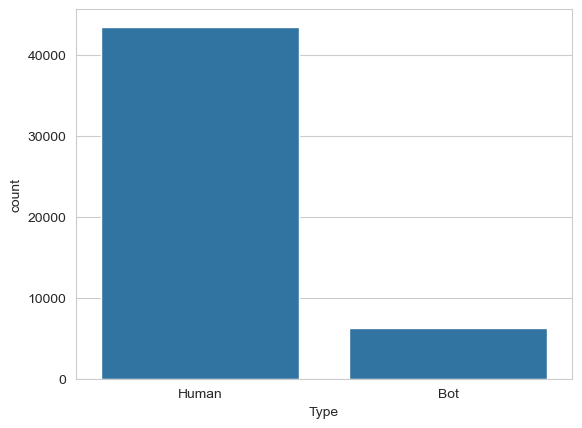

In [3]:
player_actions['Type'].value_counts()

sns.set_style('whitegrid')
sns.countplot(x='Type', data=player_actions)

In [4]:
player_information['Type'].value_counts()

Type
Human    43489
Bot       6250
Name: count, dtype: int64

In [5]:
player_information['Actor'].nunique()

49739

In [70]:
def perform_eda(df, title):
    print(f"--- {title} ---")
    
    # Visualizations
    plt.figure(figsize=(45, 40))
    df =  df.iloc[:, 2:-1]
    # # Histogram of numeric columns
    # numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    # df[numeric_cols].hist(bins=15, figsize=(45, 40), layout=(10, 10))
    # plt.suptitle(f'Histograms of Numeric Columns in {title}')
    # plt.show()
    
    # Correlation heatmap
    plt.figure(figsize=(26, 24))
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title(f'Correlation Heatmap for {title}')
    plt.show()


--- Player Information ---


<Figure size 4500x4000 with 0 Axes>

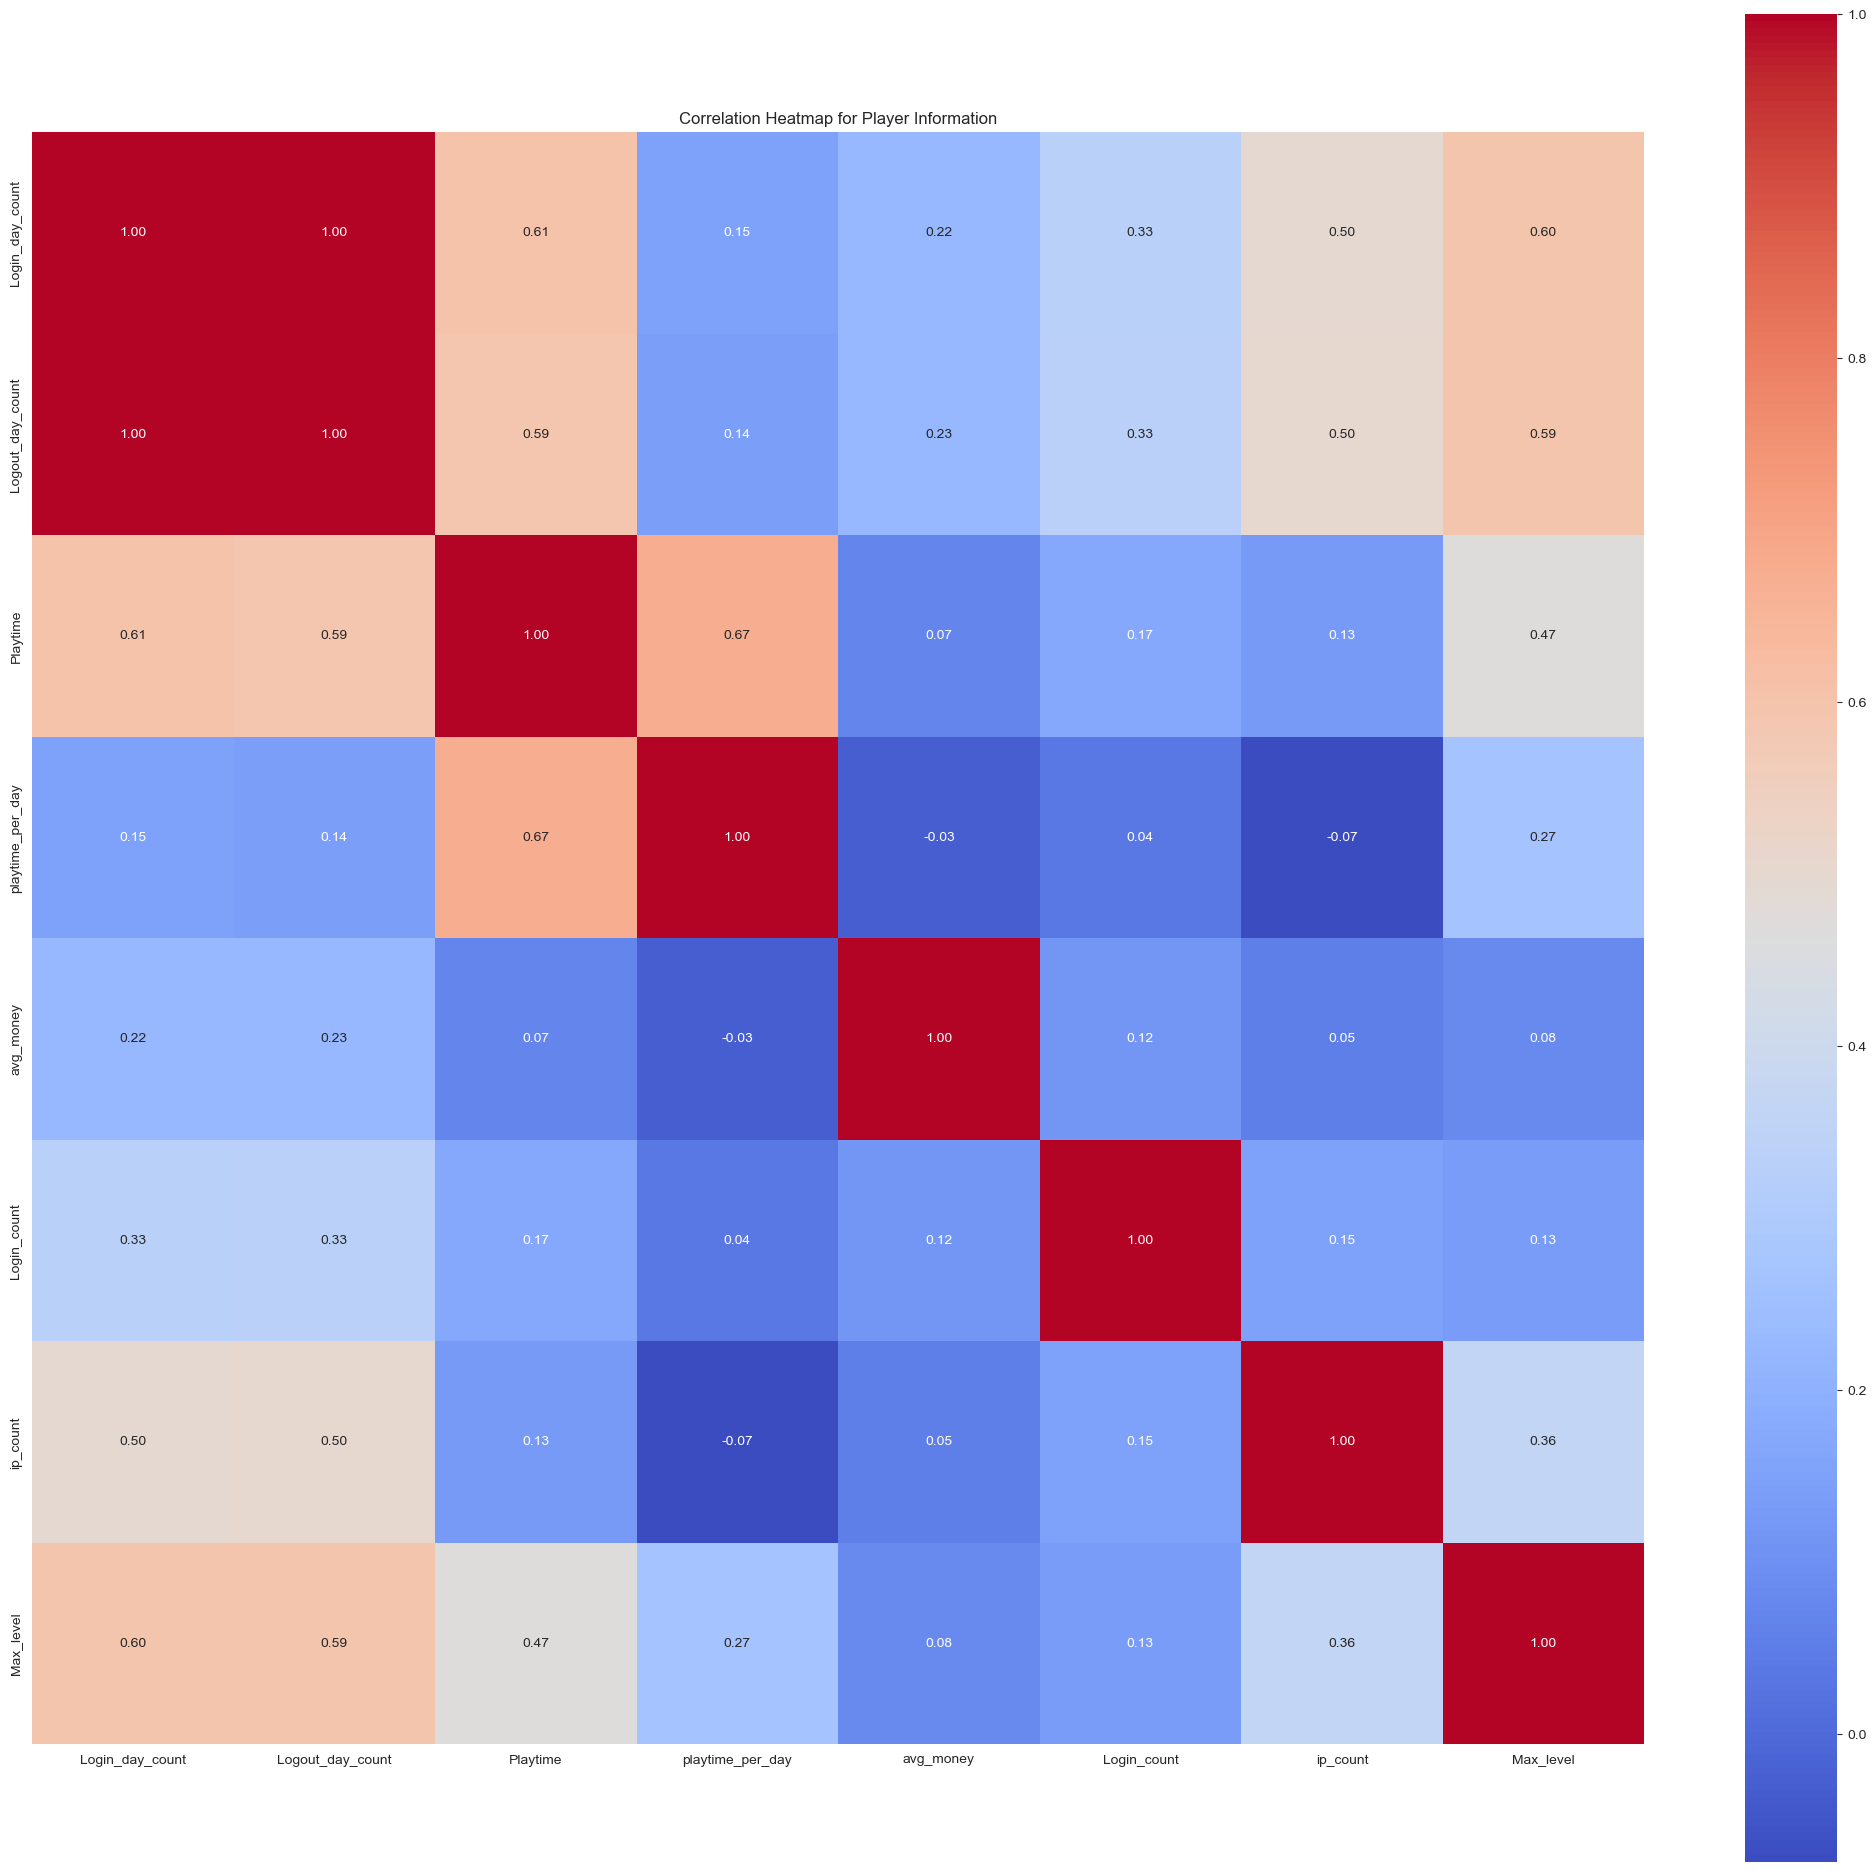

In [71]:
perform_eda(player_information, "Player Information")

--- Player Actions ---


<Figure size 4500x4000 with 0 Axes>

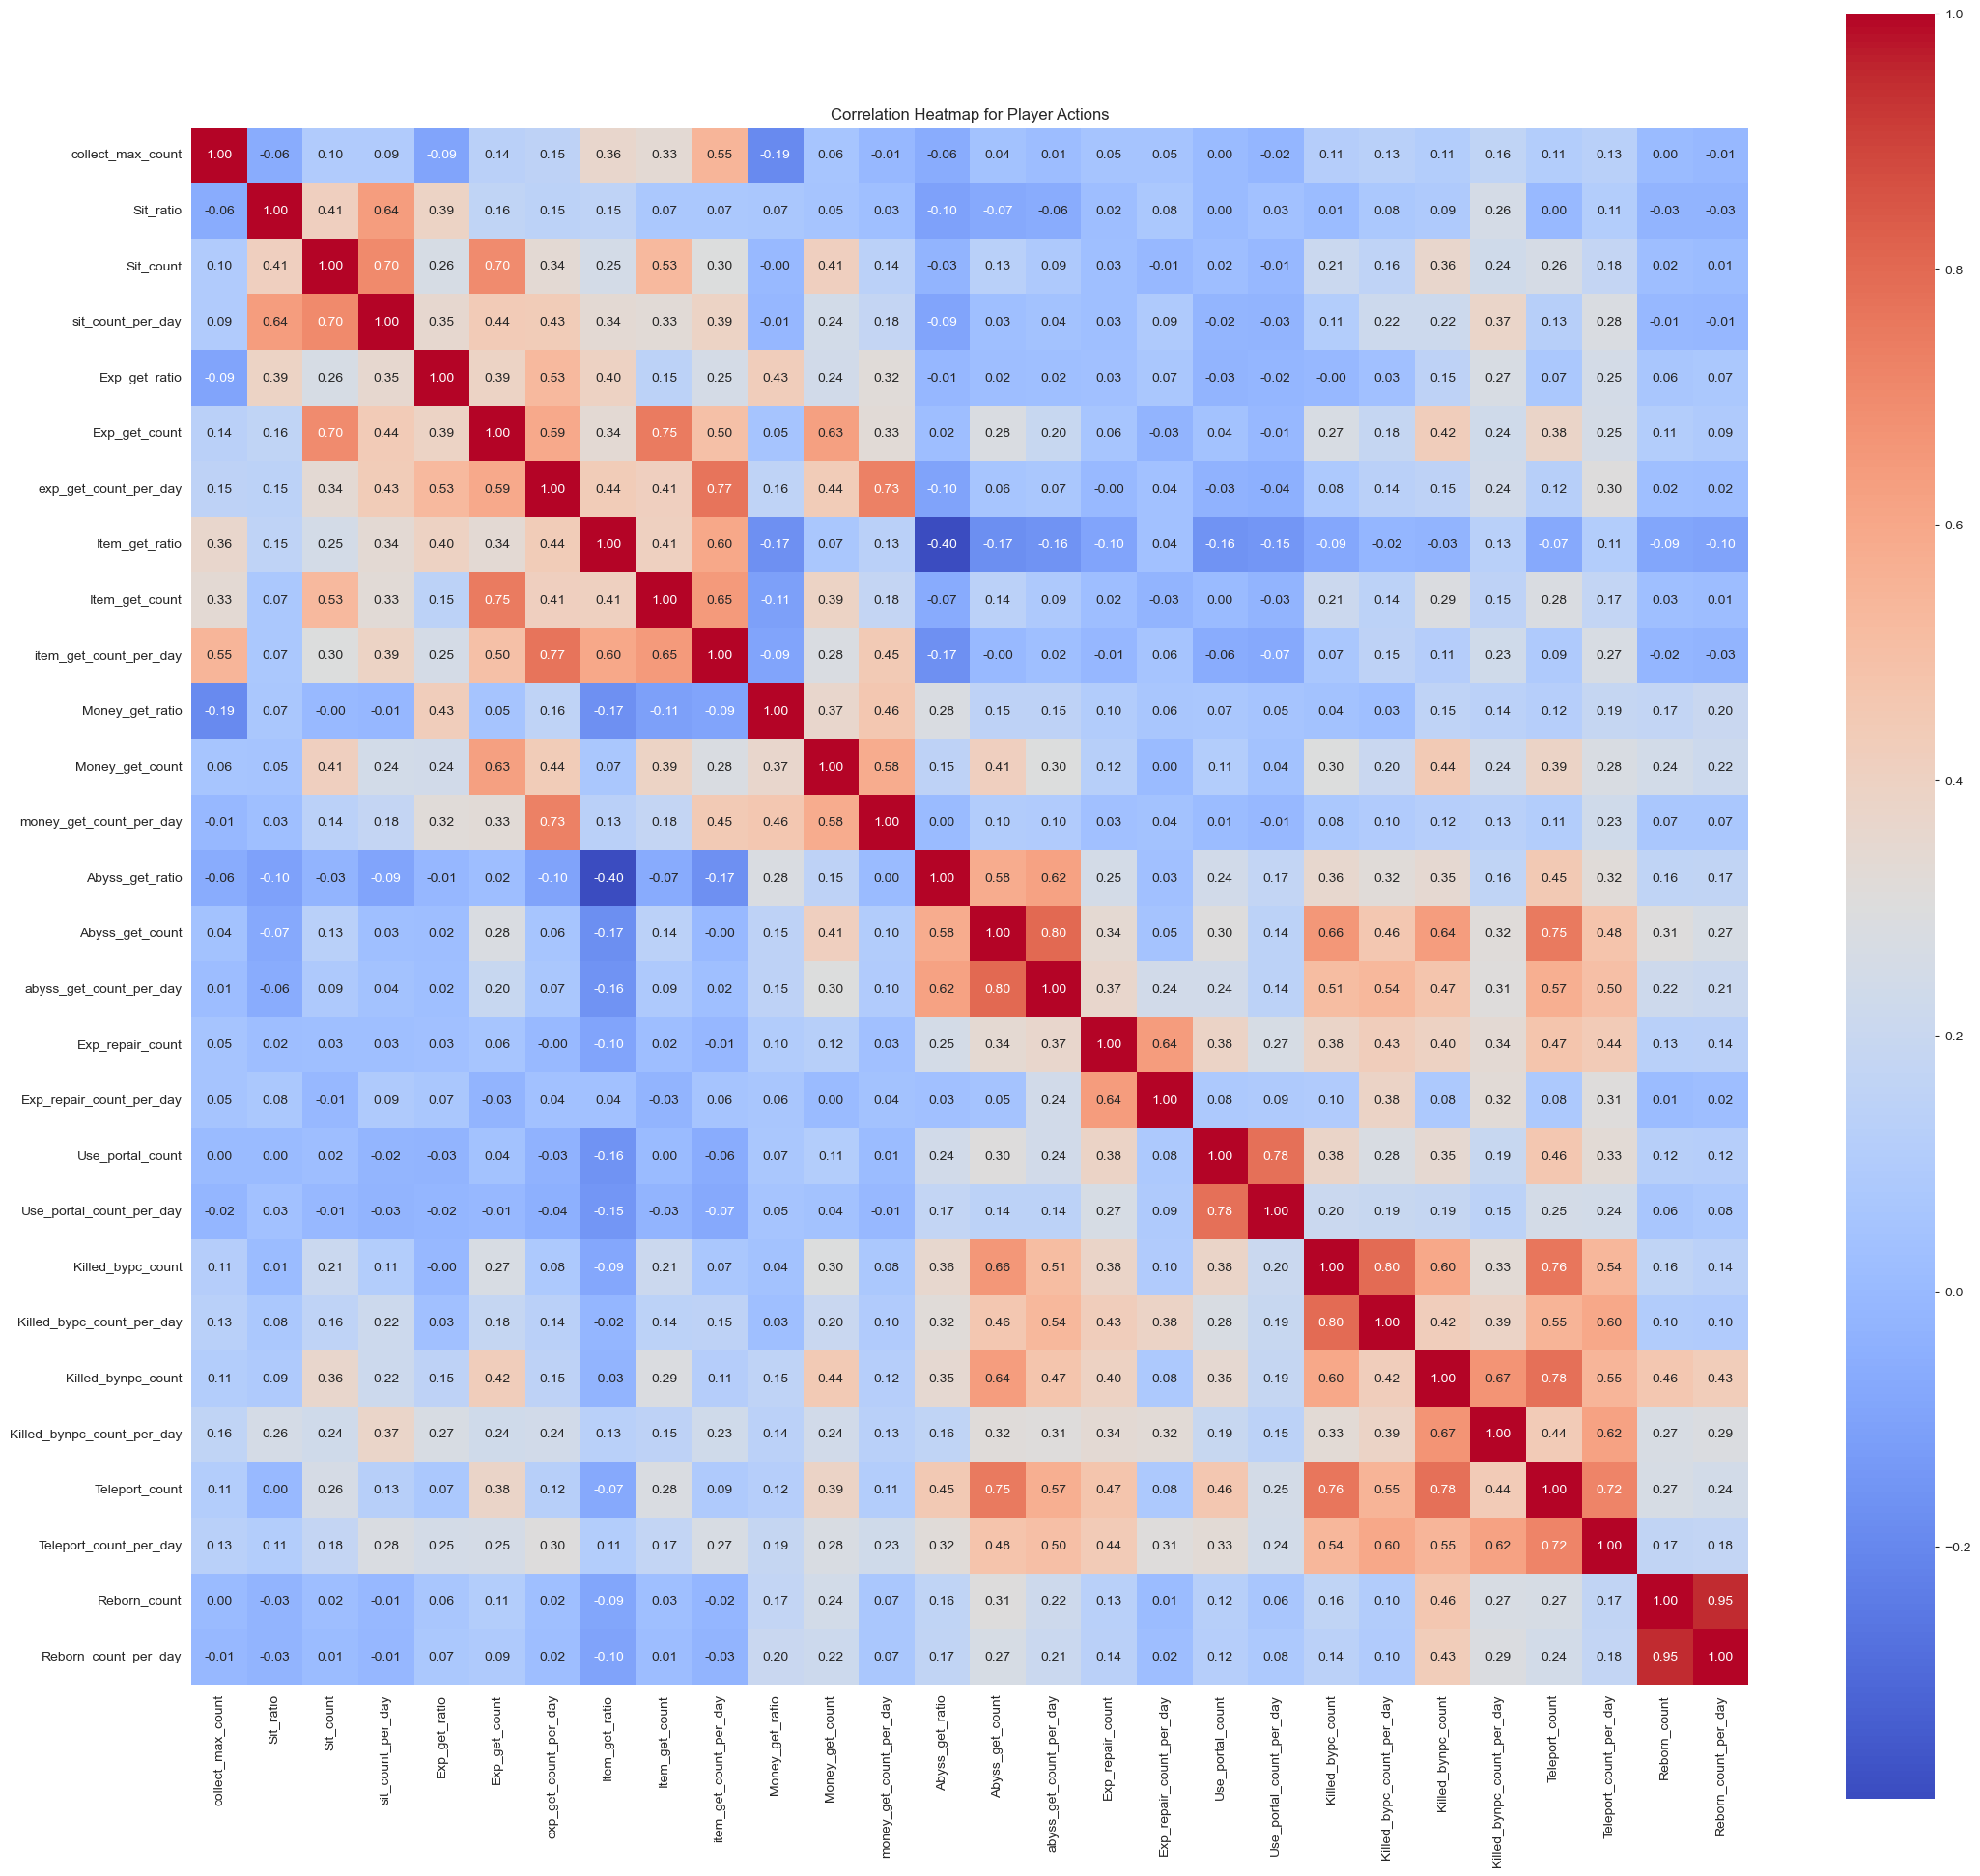

In [72]:
perform_eda(player_actions, "Player Actions")

--- Network Measures ---


<Figure size 4500x4000 with 0 Axes>

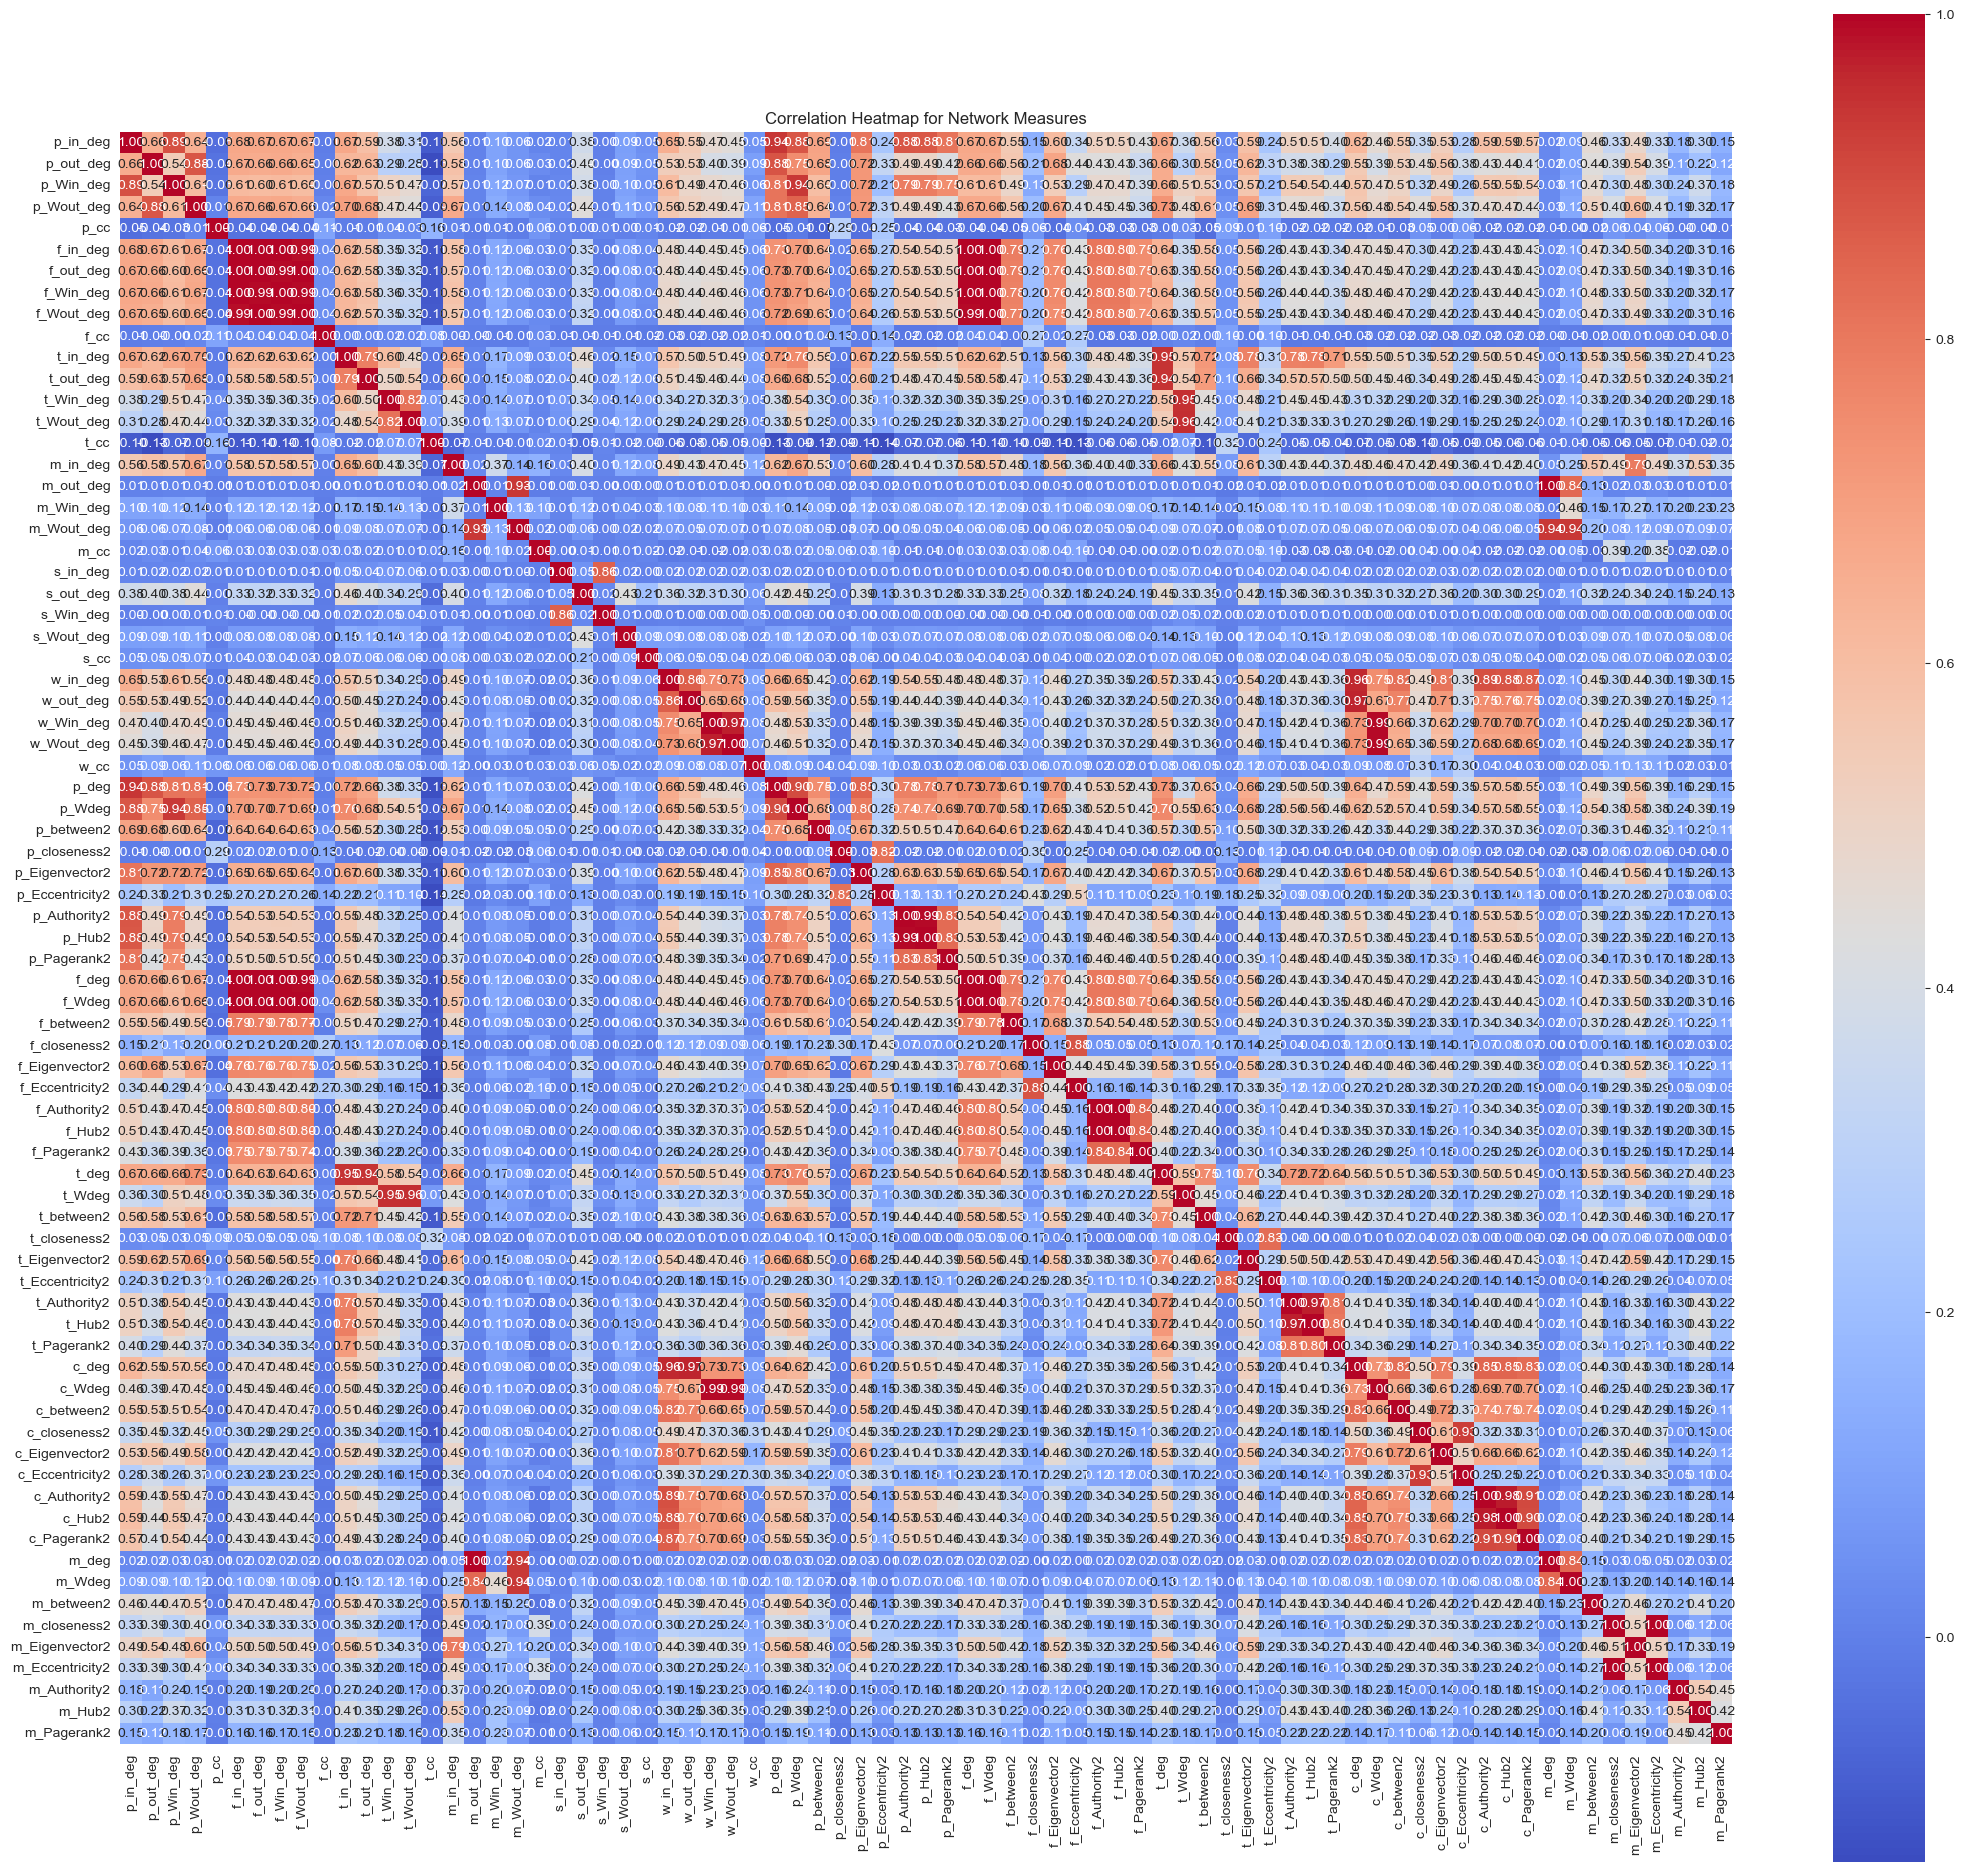

In [73]:
perform_eda(network_measure, "Network Measures")

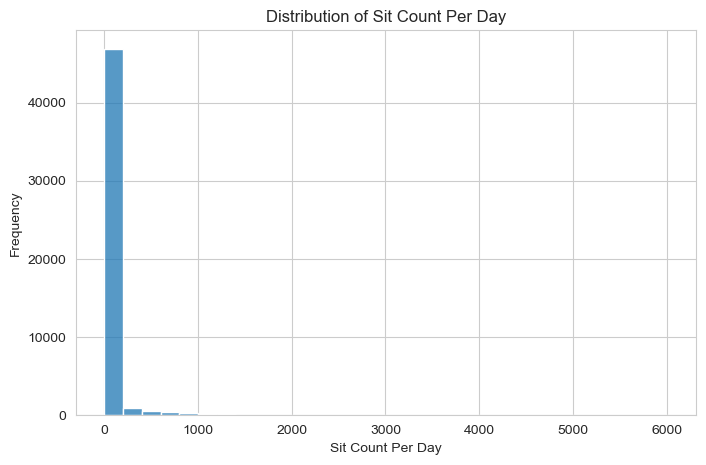

In [74]:
# Player Action: Distribution of playtime per day
plt.figure(figsize=(8, 5))
sns.histplot(player_actions['sit_count_per_day'], bins=30)
plt.title('Distribution of Sit Count Per Day')
plt.xlabel('Sit Count Per Day')
plt.ylabel('Frequency')
plt.show()

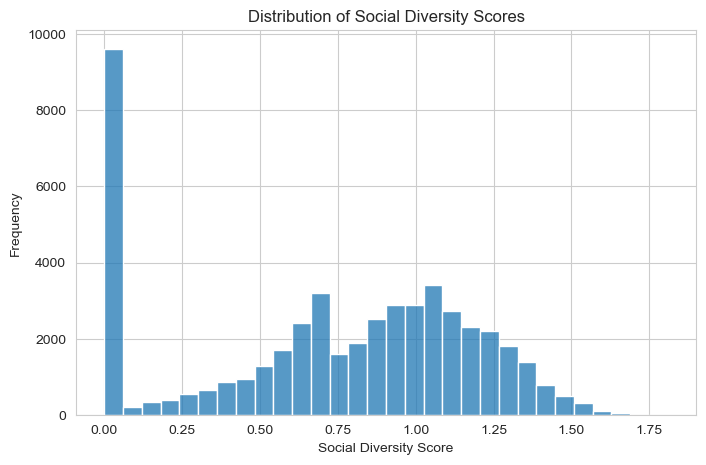

In [75]:
plt.figure(figsize=(8, 5))
sns.histplot(social_interaction['Social_diversity'], bins=30)
plt.title('Distribution of Social Diversity Scores')
plt.xlabel('Social Diversity Score')
plt.ylabel('Frequency')
plt.show()

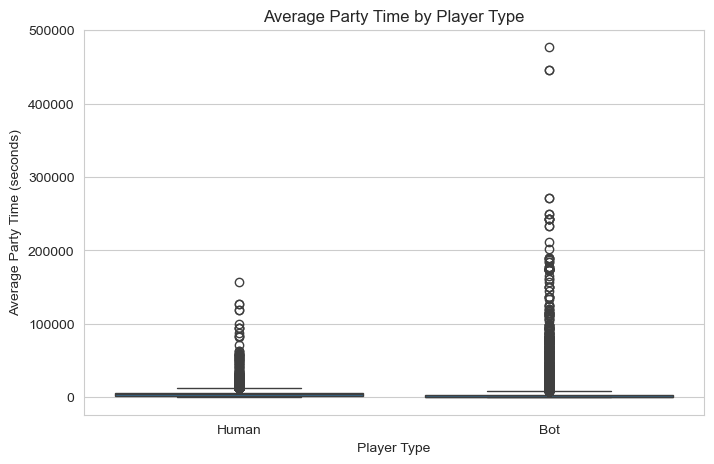

In [76]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=group_activities, x='Type', y='Avg_PartyTime')
plt.title('Average Party Time by Player Type')
plt.xlabel('Player Type')
plt.ylabel('Average Party Time (seconds)')
plt.show()


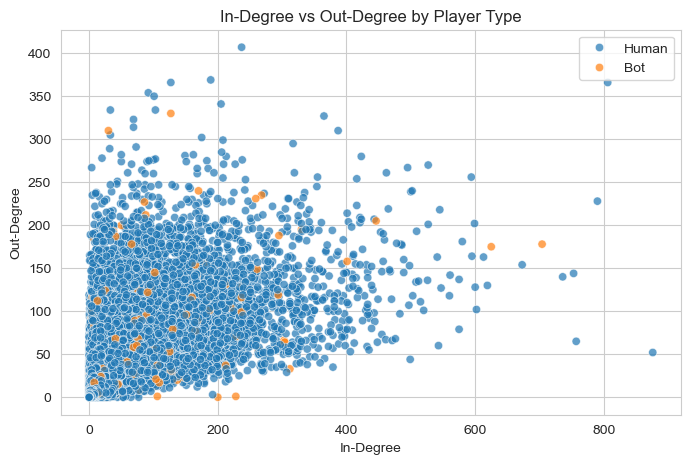

In [78]:
# Network Measures: Correlation between In-Degree and Out-Degree
plt.figure(figsize=(8, 5))
sns.scatterplot(data=network_measure, x='p_in_deg', y='p_out_deg', hue='Type', alpha=0.7)
plt.title('In-Degree vs Out-Degree by Player Type')
plt.xlabel('In-Degree')
plt.ylabel('Out-Degree')
plt.legend()
plt.show()

In [6]:
humans = player_information[player_information['Type'] == 'Human']
bots = player_information[player_information['Type'] == 'Bot']

# Sample 2000 of each, handling cases where there are fewer than 2000
num_humans = min(2000, len(humans))
num_bots = min(2000, len(bots))

sampled_humans = humans.sample(n=num_humans, random_state=42)  # Set random_state for reproducibility
sampled_bots = bots.sample(n=num_bots, random_state=42)      # Ensure same split every run


# Concatenate the sampled dataframes
sampled_df = pd.concat([sampled_humans, sampled_bots])

# Shuffle the combined dataframe (optional, but good practice)
sampled_df = sampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

sampled_df.head()

,Actor,A_Acc,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level,Type
0,428616,6346638,4,5,10895,2179.0000,6.3015,5,2,10,Human
1,433137,11017893,84,78,6329147,81142.9103,20953.3786,133,3,55,Bot
2,447250,7676828,4,4,12548,3137.0000,3.8954,5,4,11,Human
3,416536,10877481,73,68,5311015,78103.1618,5018.8040,87,3,55,Bot
4,441912,11107760,14,14,1005487,71820.5000,3397.8583,39,5,36,Bot


In [7]:
sampled_df['Type'].value_counts()

Type
Human    2000
Bot      2000
Name: count, dtype: int64

In [12]:
sampled_df['Actor'].head().to_list()

[428616, 433137, 447250, 416536, 441912]

In [8]:
#

# (Optional) Save the sampled dataframe to a new CSV file
sampled_df.to_csv('../data/sub_sample.csv', index=False)

In [10]:
sampled_df[sampled_df['Actor']]

,Actor,A_Acc,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level,Type
2481,432671,11000464,84,79,6042098,76482.2532,30038.8156,177,4,50,Bot


In [21]:
sample = sampled_df.sample(n=5, axis=0)

In [22]:
sample

,Actor,A_Acc,Login_day_count,Logout_day_count,Playtime,playtime_per_day,avg_money,Login_count,ip_count,Max_level,Type
3746,385163,8689503,16,16,87553,5472.0625,789.6983,46,16,27,Human
1501,454690,8834453,36,37,715658,19342.1081,3962.8125,73,22,40,Human
358,233533,5109516,41,41,184668,4504.0976,4674.3922,74,5,39,Human
2413,263292,8436199,16,16,28720,1795.0000,2713.6988,25,7,36,Human
3157,202735,6685325,7,7,11870,1695.7143,3777.7418,17,4,47,Human


In [24]:
sample['Actor'].to_list()

[385163, 454690, 233533, 263292, 202735]